# Q.) Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


In [1]:
# import necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df=pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
# drop categorical variables because we don't need it.
#movie1.drop(["V1","V2","V3","V4","V5"], axis = 1, inplace= True)

In [7]:
df[df.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [8]:
#encoding
df=pd.get_dummies(df)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
df1=df.iloc[:,5:]
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


### Apriori Algorithm

#### 1. Association rules with 10% Support and 70% confidence

In [10]:
# with 10% support
data=apriori(df1,min_support=0.1,use_colnames=True)
data.head()

C:\Users\Sachin\anaconda3\Anaconda-3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.2,(LOTR2)
1,0.1,(Harry Potter2)
2,0.1,(LOTR)
3,0.1,(Braveheart)
4,0.2,(Green Mile)


In [11]:
# 70% confidence
confi=association_rules(data,metric='lift',min_threshold=0.7)
confi.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(Green Mile),(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR2),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
3,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6


In [12]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
confi[confi.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(Green Mile),(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR2),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
3,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
2601,(V4_Green Mile),"(LOTR2, V2_LOTR1, V5_LOTR2, Green Mile, V1_Six...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
2602,(V5_LOTR2),"(LOTR2, V2_LOTR1, V4_Green Mile, Green Mile, V...",0.1,0.1,0.1,1.0,10.0,0.09,inf
2603,(Green Mile),"(LOTR2, V2_LOTR1, V4_Green Mile, V5_LOTR2, V1_...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
2604,(V1_Sixth Sense),"(LOTR2, V2_LOTR1, V4_Green Mile, V5_LOTR2, Gre...",0.2,0.1,0.1,0.5,5.0,0.08,1.8


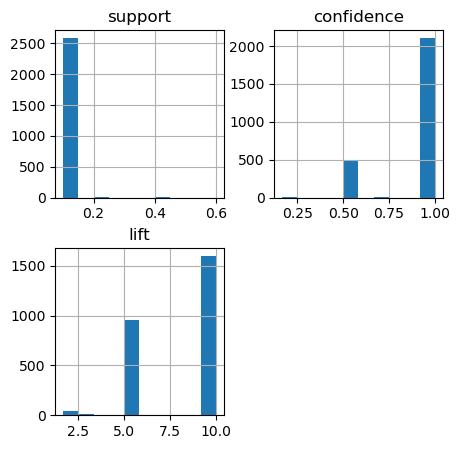

In [13]:
confi[['support', 'confidence','lift']].hist(figsize=(5,5))
plt.show()

#### 2. Association rules with 5% Support and 90% confidence

In [14]:
# with 5% support
data1=apriori(df1,min_support=0.05,use_colnames=True)
data1.head()

C:\Users\Sachin\anaconda3\Anaconda-3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.2,(LOTR2)
1,0.1,(Harry Potter2)
2,0.1,(LOTR)
3,0.1,(Braveheart)
4,0.2,(Green Mile)


In [15]:
# 70% confidence
confi1=association_rules(data1,metric='lift',min_threshold=0.7)
confi1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(Green Mile),(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR2),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
3,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6


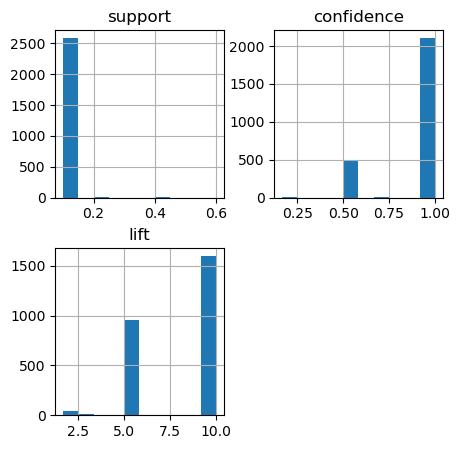

In [16]:
confi1[['support', 'confidence','lift']].hist(figsize=(5,5))
plt.show()

#### 3. Association rules with 5% Support and 90% confidence


In [17]:
# with 5% support
data2=apriori(df1,min_support=0.05,use_colnames=True)
data2.head()

C:\Users\Sachin\anaconda3\Anaconda-3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.2,(LOTR2)
1,0.1,(Harry Potter2)
2,0.1,(LOTR)
3,0.1,(Braveheart)
4,0.2,(Green Mile)


In [18]:
#90% confidence
confi2=association_rules(data2,metric='lift',min_threshold=0.9)
confi2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(Green Mile),(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR2),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
3,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6


In [19]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
confi2[confi2.lift>1]
confi2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR2),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(Green Mile),(LOTR2),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR2),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
3,(V1_LOTR1),(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
4,(LOTR2),(V1_Sixth Sense),0.2,0.2,0.1,0.5,2.5,0.06,1.6


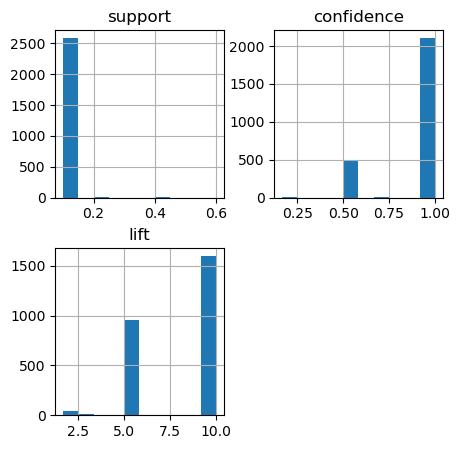

In [20]:
confi2[['support', 'confidence','lift']].hist(figsize=(5,5))
plt.show()